In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io as spio
from PIL import Image

# Projeto 1 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Yan Tavares de Oliveira
## Matrícula: 202014323

# Questão 1

## Questão 1a (0.5 pontos)

O objetivo deste exercício é estudar a decimação e a interpolação de sinais. 
Escreva uma função em python que receba um sinal x[n] e retorne um sinal y[n] que seja a decimação por um fator de 2 do sinal de entrada x[n]. 

Em seguida, use a sua função para encontrar o sinal decimado para a entrada: 

$$ x = \left[1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0 \right]$$

In [2]:
### Código da questão 1a.

x = np.array([1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0])

def decimationBy2(x):
    return x[::2]

y = decimationBy2(x)
print(y)

[1 1 1 1 1 1 1 1 1 1]


## Questão 1b (0.5 pontos)

Escreva uma função em python que receba um sinal y[n] e retorne um sinal z[n] que seja a interpolação por um fator de 2 do sinal de entrada y[n]. A sua função deve aumentar o número de amostras e assinalar um novo valor para as amostras criadas. Você pode escolher se as amostras interpoladas terão o valor médio das amostras ou o valor da amostra anterior. 

Em seguida, utilize a sua função para encontrar o sinal interpolado para o sinal y[n] da questão anterior (1a).


In [3]:
### Código da questão 1b.
def interpolationBy2(x):
    interpolated = np.zeros(len(x)*2)
    
    for i in range(len(x)):
        interpolated[2*i] = x[i]
        
    for i in range(len(x)-1):
        interpolated[2*i+1] = (int(x[i]) + int(x[i+1])) // 2
    
    interpolated[-1] = x[-1]
    
    return interpolated

z = interpolationBy2(y)
print(z)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Questão 1c (1 ponto)

Uma imagem é um sinal discreto de duas dimensões. 
Escrevemos I(x,y) para representar esta imagem como uma matriz bidimensional de dimensões (w x h), onde w é a largura da imagem e h a sua altura.

Para imagens, fazemos a decimação e a interpolação separadamente, para todas as linhas e, em seguida, para todas as colunas (ou vice-versa), considerando que cada linha ou coluna é um sinal de uma dimensão.

Aplique o seu algoritmo de decimação sucessivamente até obter uma imagem com tamanho (w/16 x h/16), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante.

Imagem original de tamanho: 512 x 512
Imagem interpolada de tamanho: 32 x 32


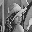

In [4]:
im = Image.open("lena.bmp")  #O objeto im é da classe Image.
A = np.array(im)             #Transformo o objeto Image para a classe NP.array  
h, w = A.shape
print(f'Imagem original de tamanho: {h} x {w}')
im

imArr = np.array(im)
for _ in range(4):
    imArr = np.apply_along_axis(decimationBy2, axis=0, arr=imArr)
    imArr = np.apply_along_axis(decimationBy2, axis=1, arr=imArr)

decIm = Image.fromarray(np.uint8(imArr))

A = np.array(decIm)
h, w = A.shape
print(f'Imagem interpolada de tamanho: {h} x {w}')
decIm

## Questão 1d (1 ponto)

Utilizando como entrada a imagem decimada (de tamanho w/16 x h/16) da questão anterior (1c), aplique o seu algoritmo de interpolação sucessivamente até obter uma imagem com tamanho (w x h), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante. Compare a imagem original com a imagem que foi decimada/interpolada. 

Imagem interpolada de tamanho: 512 x 512


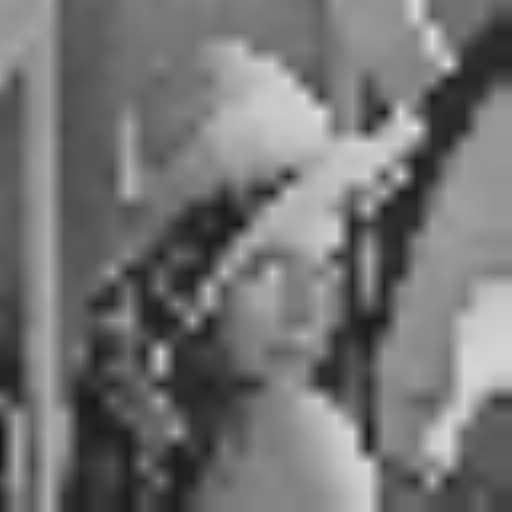

In [5]:
### Código da questão 1d.
imArr = np.array(decIm)
for _ in range(4):
    imArr = np.apply_along_axis(interpolationBy2, axis=0, arr=imArr)
    imArr = np.apply_along_axis(interpolationBy2, axis=1, arr=imArr)

intIm = Image.fromarray(np.uint8(imArr))

A = np.array(intIm)
h, w = A.shape
print(f'Imagem interpolada de tamanho: {h} x {w}')
intIm

# Questão 2

Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] + \frac{1}{6}y\left[n\right] = x\left[n+2\right] + 2x\left[n+1\right]+x\left[n\right] $$
$$ x\left[n\right] = \left(\frac{1}{4}\right)^n u\left[n\right] $$
$$ y\left[-1\right] = y\left[-2\right] = 0 $$

## Questão 2a (1 ponto)

Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [6]:
### Código da questão 2a.

## Questão 2b (1 ponto)
Escreva um código para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida iterativamente com a resposta analítica para as primeiras 100 amostras, plotando o gráfico das duas respostas.

Calcule também o erro médio quadrático entre os dois sinais, h[n] analítico e g[n] iterativo, através da equação:

$$ MSE = \frac{1}{N} \sum_{i=0}^{N-1} \left( h\left[i\right] - g\left[i\right] \right)^2 $$

onde N é o número de amostras considerado (no caso, 100 amostras).

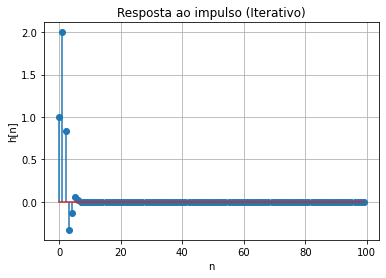

In [7]:
### Código da questão 2b.

# inicializa a resposta ao impulso

def h(n):
    x = np.zeros(n)
    x[0] = 1

    h = np.zeros(n)
    h[0] = 1
    h[1] = 2

    for n in range(n-2):
        h[n + 2] = x[n + 2] + 2 * x[n + 1] + x[n] - (1/6) * h[n]
    
    return h
    
plt.stem(h(100))
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title("Resposta ao impulso (Iterativo)")
plt.grid(True)
plt.show()

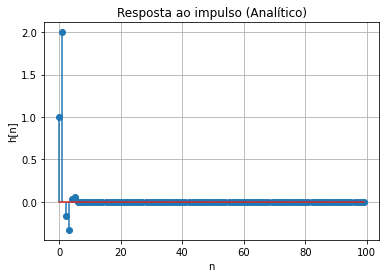

MSE = 0.010276499499479152


In [8]:
### Código da questão 2b.

# inicializa a resposta ao impulso
x = np.zeros(100)
x[0] = 1

h1 = np.zeros(100)

for n in range(0,100):
    h1[n] = 5*((0.408)**n)*np.cos(np.pi * n / 2 - 0.436 * np.pi)

    
plt.stem(h1)
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title("Resposta ao impulso (Analítico)")
plt.grid(True)
plt.show()

mse = np.sum((h(100) - h1)**2 * 0.01)
print("MSE =", mse)

## Questão 2c (1 ponto)

Determine a resposta do sistema às condições iniciais dadas analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [9]:
### Código da questão 2c.

### Questão 2d (1 ponto)
Escreva um programa para obter a resposta do sistema através da convolução da entrada com a resposta ao impulso h[n] truncada para as primeiras 20 amostras (isto é, considerando apenas as primeiras 20 amostras de h[n]).

Compare a resposta obtida pela convolução com a resposta obtida analiticamente, plotando o gráfico das duas respostas (calcule as primeiras 100 amostras do sinal). Calcule também o erro médio quadrático entre os dois sinais.

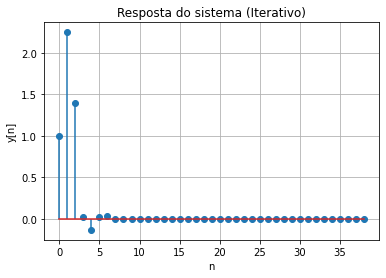

In [10]:
### Código da questão 2d.

x = np.zeros(20)
for i in range(20):
    x[i] = (0.25)**i

y = np.convolve(h(20), x)

plt.stem(y)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Resposta do sistema (Iterativo)")
plt.grid(True)
plt.show()


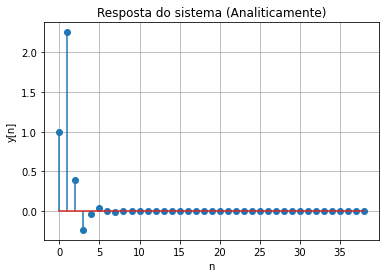

MSE = 0.010740646345840803


In [11]:
y1 = np.convolve(x, h1[:20])

plt.stem(y1)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Resposta do sistema (Analiticamente)")
plt.grid(True)
plt.show()

msey = np.sum((y - y1)**2 * 0.01)
print("MSE =", msey)

## Questão 2e (1 ponto)

Usando como entrada o sinal disponibilizado ('data_projeto1.mat'), determine a resposta do sistema. Plote o gráfico da entrada e da saída do sistema. 

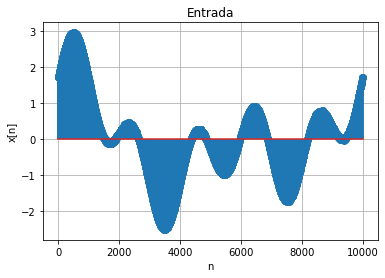

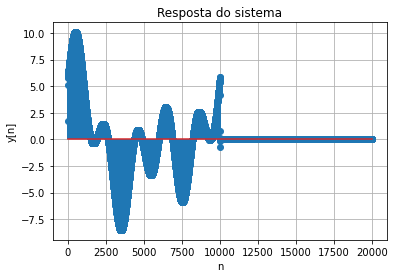

In [12]:
### Códgio da Questão 2e
sinal = spio.loadmat('data_projeto1.mat')['sinal'].ravel()


resposta = np.convolve(sinal, h(10001))

plt.stem(sinal)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Entrada")
plt.grid(True)
plt.show()


plt.stem(resposta)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Resposta do sistema")
plt.grid(True)
plt.show()

# Questão 3
Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] -2~\cos \left( \frac{\pi}{8} \right) y\left[n+1\right] + y\left[n\right] = x\left[n\right] $$

## Questão 3a (1 ponto)
Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [13]:
### Código da questão 3a

## Questão 3b (1 ponto)
Escreva um programa para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida com a resposta analítica, plotando o gráfico das duas respostas para as primeiras 100 amostras. Calcule também o erro médio quadrático entre os dois sinais.

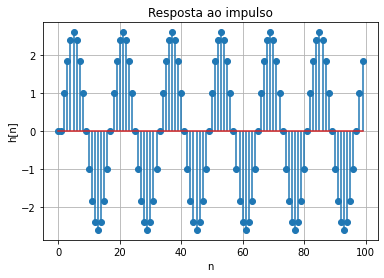

In [14]:
### Código da questão 3b

x = np.zeros(100)
x[0] = 1

h = np.zeros(100)

h[0] = 0
h[1] = 0

for n in range(98):
    h[n+2] = 2*np.cos(np.pi/8) * h[n+1] - h[n] + x[n]

plt.stem(h)
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title("Resposta ao impulso")
plt.grid(True)
plt.show()

